In [3]:
!pip install transformers

     |████████████████████████████████| 1.4MB 6.0MB/s 
     |████████████████████████████████| 2.9MB 21.4MB/s 
     |████████████████████████████████| 890kB 42.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=a98526e640c8911b4d8f33ac35d3ee2938cb2e9586c81650ca7d901246183cc5
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [4]:
!pip install torch torchvision

In [5]:
from google.colab import drive,files
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
!unzip /content/drive/MyDrive/DS2021/Datasets/archive\(8\).zip 

Streaming output truncated to the last 5000 lines.
  inflating: images/images/image_train/image_941622041_product_207151319.jpg  
  inflating: images/images/image_train/image_941622046_product_207151571.jpg  
  inflating: images/images/image_train/image_941622048_product_207151338.jpg  
  inflating: images/images/image_train/image_941622055_product_207151480.jpg  
  inflating: images/images/image_train/image_941622057_product_207151296.jpg  
  inflating: images/images/image_train/image_941622063_product_207151539.jpg  
  inflating: images/images/image_train/image_941622065_product_207151527.jpg  
  inflating: images/images/image_train/image_941622067_product_207151563.jpg  
  inflating: images/images/image_train/image_941622071_product_207151331.jpg  
  inflating: images/images/image_train/image_941622073_product_207151492.jpg  
  inflating: images/images/image_train/image_941622084_product_207151508.jpg  
  inflating: images/images/image_train/image_941622086_product_207151543.jpg  
 

In [7]:
import pandas as pd
import numpy as np 
from nltk import WordPunctTokenizer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords


Image Path
 training :" ../input/rakuten-france-multimodal-product-classification/images/images/image_test"
 
test: "../input/rakuten-france-multimodal-product-classification/images/images/image_train"


In [8]:
x_train = pd.read_csv("/content/X_train_update.csv")
y_train = pd.read_csv("/content/Y_train_CVw08PX.csv")
x_test = pd.read_csv("/content/X_test_update.csv")

In [9]:
x_train.columns

Index(['Unnamed: 0', 'designation', 'description', 'productid', 'imageid'], dtype='object')

In [10]:
x_train.head()

,Unnamed: 0,designation,description,productid,imageid
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [11]:
x_train.rename(columns={"Unnamed: 0": "Id"}, inplace=True)
y_train.rename(columns={"Unnamed: 0": "Id"}, inplace=True)
x_test.rename(columns={"Unnamed: 0": "Id"}, inplace=True)

In [12]:
x_train.describe()

,Id,productid,imageid
count,84916.000000,8.491600e+04,8.491600e+04
mean,42457.500000,2.555468e+09,1.152691e+09
std,24513.282066,1.588656e+09,1.751427e+08
min,0.000000,1.839120e+05,6.728400e+04
25%,21228.750000,6.760519e+08,1.056269e+09
50%,42457.500000,3.190506e+09,1.213354e+09
75%,63686.250000,3.995599e+09,1.275646e+09
max,84915.000000,4.252012e+09,1.328824e+09


In [13]:
y_train.describe()

,Id,prdtypecode
count,84916.000000,84916.000000
mean,42457.500000,1773.219900
std,24513.282066,788.179885
min,0.000000,10.000000
25%,21228.750000,1281.000000
50%,42457.500000,1920.000000
75%,63686.250000,2522.000000
max,84915.000000,2905.000000


In [14]:
h=y_train.prdtypecode.value_counts()

In [15]:
len(h)

27

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


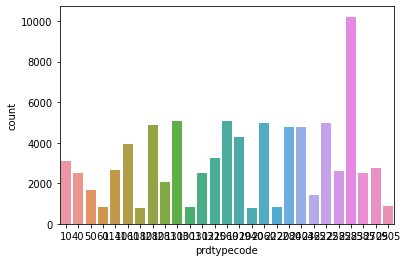

In [16]:
import seaborn as sns
sns.countplot(y_train.prdtypecode)

In [17]:
len(x_train)

84916

In [18]:
x_train.sample(5)

,Id,designation,description,productid,imageid
25326,25326,Carnet De Notes Bloc-Notes Cahier Ally Lgbt La...,Taille: En format A5 (144 cm x 21 cm) Caracter...,4164672046,1305144374
82130,82130,Fauteuil Bob Style Scandinave En Tissu Taupe C...,Entre le canapé à coté de votre table basse ou...,4149370647,1304115645
49522,49522,3 cartouches de filtration H - Intex,Cartouches de filtration H vendues en lot de 3...,1876686944,1190258088
8589,8589,Magideal Set Touchpad Boutons R1 / L1 R2 / L2 ...,<p><b>La description:</b></p><br /><p> Compati...,4141684994,1299537676
35022,35022,Inazuma Eleven - Playcard Gojin Tetsunosuke,NaN,4184453534,1311157820


In [19]:
y_train.sample(5)

,Id,prdtypecode
27630,27630,1560
71260,71260,1320
5135,5135,1560
67751,67751,1560
77061,77061,1302


In [20]:
print(x_test.sample(5))

          Id  ...     imageid
13436  98352  ...  1256824315
11674  96590  ...  1310548748
12422  97338  ...  1027825514
7280   92196  ...  1273174792
1756   86672  ...   971432380

[5 rows x 5 columns]


classifcation multinomiale non balance

In [21]:
!pip install sentencepiece

     |████████████████████████████████| 1.1MB 8.1MB/s 


In [22]:
import torch
from transformers import CamembertTokenizer

model_name = "camembert-base"
tokenizer = CamembertTokenizer.from_pretrained(model_name)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Average length: 22.4
Max length: 104


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


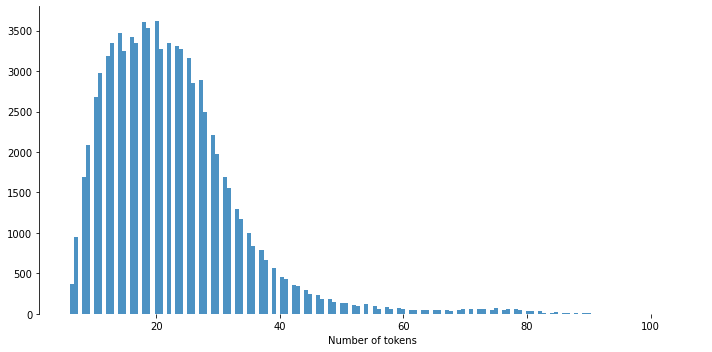

In [23]:
import matplotlib.pyplot as plt
reviews_len = [len(tokenizer.encode(review, max_length=512))
                          for review in x_train.designation.values]
print("Average length: {:.1f}".format(np.mean(reviews_len)))
print("Max length: {}".format(max(reviews_len)))

plt.figure(figsize=(10,5))
ax = sns.distplot(reviews_len, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Number of tokens')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('./number_of_tokens.png', dpi=200)

In [24]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import spacy
import nltk
nltk.download('stopwords')
!python -m spacy download en_core_web_md
import en_core_web_md
nlp = en_core_web_md.load()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 96.4MB 1.2MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=62d3a2ce034ed42c6ed2510c7dec6f8e4c70dea856ab32c38295f9636bf120a6
  Stored in directory: /tmp/pip-ephem-wheel-cache-6b5nier5/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [27]:
class simple_Text_cleaner(BaseEstimator, TransformerMixin):
  # add another additional parameter, just for fun, while we are at it
    def __init__(self, stopwords,columns,tokenizer=WordPunctTokenizer()): 
        self.columns = columns
        self.stopwords = stopwords
        self.tokenizer=tokenizer
    def rm_stopwords(self,tokens):
        tokens=self.tokenizer.tokenize(tokens)
        return [ tk for tk in tokens if  tk not in self.stopwords ]
    def text_clean_up(self,s=""):
        import re
        user_pattern       = '@[^\s]+'
        s=re.sub(user_pattern, "", s)
        remove = '"#$%&()*+/:;<=>@[\\]^_`{|}~”“'
        pattern = r"[{}]".format(remove)
        s=re.sub(pattern,' ', s) 
        sequencePattern   = r"(.)\1\1+"
        seqReplacePattern = r"\1\1"
        s=re.sub(sequencePattern, seqReplacePattern, s)
        s=re.sub("<[^>]*>",' ', s)
        s=re.sub("[\r\n]+",' ', s)
        s=re.sub("http\S+",' ', s)
        s=re.sub("\$[^>]*\$",' ', s)
        s=re.sub("\d+",' ', s)
        s=re.sub("\s\s+",' ', s)
        s.strip()
        return s
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X_=X.copy()
        X_["image_path"]=(X_["imageid"].apply(lambda x: str(int(x)))+"_product_"+X_["productid"].apply(lambda x: str(int(x)))+".jpg").apply(lambda x: "image_"+x)
        for i in self.columns:
            X_[i]=X_[i].apply(lambda x: " ".join(self.rm_stopwords(self.text_clean_up(x))))
        return X_

In [28]:
stop_words = stopwords.words('french')
stop_words.extend(stopwords.words('english'))
cleaner=simple_Text_cleaner(stopwords=stop_words,columns=["designation"])
new_data=cleaner.transform(x_train)

image_imageid_product_productid.jpg.

Average length: 19.7
Max length: 114


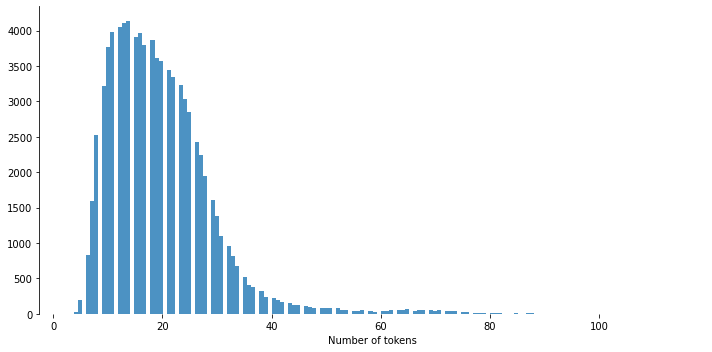

In [29]:
new_reviews_len = [len(tokenizer.encode(review, max_length=512))
                          for review in new_data.designation.values]
print("Average length: {:.1f}".format(np.mean(new_reviews_len)))
print("Max length: {}".format(max(new_reviews_len)))

plt.figure(figsize=(10,5))
ax = sns.distplot(new_reviews_len, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Number of tokens')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('./number_of_tokens_clean.png', dpi=200)

On va travailler sur un max_length de 60 

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cpu=torch.device("cpu")

In [31]:
!pip install omegaconf
!pip install hydra-core

     |████████████████████████████████| 276kB 11.8MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44620 sha256=0c3343727620ae9a39c394953d1f51d3e77b36b67ee2168d53d0ee192cec2b27
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


     |████████████████████████████████| 122kB 7.7MB/s 
     |████████████████████████████████| 112kB 8.6MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp36-none-any.whl size=141231 sha256=61778d08737a0807087918e6737f4137df006d34772fcd1afeff2cd5c022b8c0
  Stored in directory: /root/.cache/pip/wheels/e3/e2/fa/b78480b448b8579ddf393bebd3f47ee23aa84c89b6a78285c8
Successfully built antlr4-python3-runtime


In [32]:
from transformers import CamembertModel, CamembertTokenizer

# You can replace "camembert-base" with any other model from the table, e.g. "camembert/camembert-large".
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
camembert = CamembertModel.from_pretrained("camembert-base")

camembert.eval()  # disable dropout (or leave in train mode to finetune)

import torch
# Tokenize in sub-words with SentencePiece
tokenized_sentence = tokenizer.tokenize("J'aime le camembert !")
# ['▁J', "'", 'aime', '▁le', '▁ca', 'member', 't', '▁!'] 
print(tokenized_sentence)
# 1-hot encode and add special starting and end tokens 
encoded_sentence = tokenizer.encode(tokenized_sentence)
# [5, 121, 11, 660, 16, 730, 25543, 110, 83, 6] 
# NB: Can be done in one step : tokenize.encode("J'aime le camembert !")
print(encoded_sentence)
# Feed tokens to Camembert as a torch tensor (batch dim 1)BERT
encoded_sentence = torch.tensor(encoded_sentence).unsqueeze(0)
embeddings= camembert(encoded_sentence)["last_hidden_state"]
#print(embeddings.size())
# embeddings.detach()
# embeddings.size torch.Size([1, 10, 768])
# tensor([[[-0.0254,  0.0235,  0.1027,  ..., -0.1459, -0.0205, -0.0116],
#         [ 0.0606, -0.1811, -0.0418,  ..., -0.1815,  0.0880, -0.0766],
#         [-0.1561, -0.1127,  0.2687,  ..., -0.0648,  0.0249,  0.0446],
#         ...,



from transformers import CamembertConfig
# (Need to reload the model with new config)
config = CamembertConfig.from_pretrained("camembert-base", output_hidden_states=True)
camembert = CamembertModel.from_pretrained("camembert-base", config=config)
camembert.eval()  # disable dropout (or leave in train mode to finetune)

all_layer_embeddings = camembert(encoded_sentence)[2]
#  all_layer_embeddings list of len(all_layer_embeddings) == 13 (input embedding layer + 12 self attention layers)
all_layer_embeddings[5]
print(len(all_layer_embeddings))
# layer 5 contextual embedding : size torch.Size([1, 10, 768])
#tensor([[[-0.0032,  0.0075,  0.0040,  ..., -0.0025, -0.0178, -0.0210],
#         [-0.0996, -0.1474,  0.1057,  ..., -0.0278,  0.1690, -0.2982],
#         [ 0.0557,


['▁J', "'", 'aime', '▁le', '▁ca', 'member', 't', '▁!']
[5, 121, 11, 660, 16, 730, 25543, 110, 83, 6]
13


In [87]:
all_layer_embeddings[-1].size()

torch.Size([1, 10, 768])

In [34]:
def encode_reviews(tokenizer, reviews, max_length):
    token_ids = np.zeros(shape=(len(reviews), max_length),
                         dtype=np.int32)
    for i, review in enumerate(reviews):
        encoded = tokenizer.encode(review, max_length=max_length)
        token_ids[i, 0:len(encoded)] = encoded
    attention_mask = (token_ids != 0).astype(np.int32)
    return {"input_ids": token_ids, "attention_mask": attention_mask}


In [35]:
class CamembertPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, tokenizer, max_seq_length,column):
        self.tokenizer = tokenizer
        self.max_seq_length = max_seq_length
        self.column=column
    def fit(self, X=None):
        return self 
    
    def transform(self, X, y):
        # 1. Tokenize
        X_encoded=X.copy()
        X_encoded[self.column] = encode_reviews(self.tokenizer, X[columns], self.max_seq_length)
        return X_encoded     
    
    def fit_transform(self, X, y):        
        return self.transform(X, y)

In [37]:
MAX_SEQ_LEN = 60 

short_reviews = sum(np.array(reviews_len) <= MAX_SEQ_LEN)
long_reviews = sum(np.array(reviews_len) > MAX_SEQ_LEN)

print("{} reviews with LEN > {} ({:.2f} % of total data)".format(
    long_reviews,
    MAX_SEQ_LEN,
    100 * long_reviews / len(reviews_len)
))

1129 reviews with LEN > 60 (1.33 % of total data)


Simple sentence embedding strategy: mean of second to last hidden layer

In [38]:
import torch.nn as nn 
import transformers as tt
from transformers import CamembertModel, CamembertTokenizer
class Second_to_last_SentenceEmbedding(nn.Module):
    def __init__(self):
        #super(, self).__init__()
        super().__init__()
        self.config = CamembertConfig.from_pretrained("camembert-base", output_hidden_states=True)
        self.camembert =CamembertModel.from_pretrained("camembert-base", config=self.config)
        self.fc1=nn.Linear(768,100)
        self.relu=nn.ReLU()
        self.fc2=nn.Linear(100,27)
        for p in self.camembert.parameters():
            p.requires_grad_(False)
    def forward(self, input,attention_mask=None):
        hidden = self.camembert(input,attention_mask=attention_mask)[2]
        token_vecs=hidden[-2]
        x=torch.mean(token_vecs,dim=1)
      
        return torch.mean(token_vecs,dim=1)

In [39]:
model=Second_to_last_SentenceEmbedding().to(device)

In [40]:
model.eval()

Second_to_last_SentenceEmbedding(
  (camembert): CamembertModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32005, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (La

In [41]:
x_train.shape

(84916, 5)

In [42]:
model(encoded_sentence.to(device)).size()

torch.Size([1, 768])

In [43]:
tokenizer.encode_plus(
                        "J'aime le camembert !",                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


{'input_ids': tensor([[    5,   121,    11,   660,    16,   730, 25543,   110,    83,     6,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}

- Loading Image 
First we will build a custom Dataset uitilitaries and a Data Loader

In [44]:
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils


In [45]:
class MultimodalDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self,tokenizer, input_csv_file, root_dir,max_length=60 , transform=None,Y_csv_file=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.input_file = pd.read_csv(input_csv_file)
        self.input_file.rename(columns={"Unnamed: 0": "Id"}, inplace=True)
        self.root_dir = root_dir
        self.transform = transform
        self.max_length=max_length
        self.input_file["image_path"]=(self.input_file["imageid"].apply(lambda x: str(int(x)))+"_product_"+self.input_file["productid"].apply(lambda x: str(int(x)))+".jpg").apply(lambda x: "image_"+x)
        if Y_csv_file !=None:
            self.output = pd.read_csv(Y_csv_file)
            self.output.rename(columns={"Unnamed: 0": "Id"}, inplace=True)
            self.classes = list(set(self.output["prdtypecode"].values))
        else:
            self.ouptut=None
    def __len__(self):
        return len(self.input_file)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_name = os.path.join(self.root_dir,
                                self.input_file["image_path"].iloc[idx])
        image = io.imread(img_name)
        text = self.input_file["designation"].iloc[idx]
        encoded_text = tokenizer.encode_plus(
                        text,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
        sample = {'image': image, 'input_ids':encoded_text['input_ids'] ,'attention_mask':encoded_text['attention_mask']}

        if self.transform:
            sample['image'] = self.transform(sample['image'])
        if self.output is None:
            return sample
        sample["label"]=torch.tensor(self.classes.index(self.output["prdtypecode"].loc[self.input_file["Id"].iloc[idx]]))
        return sample

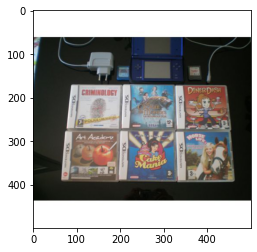

In [46]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
def show_landmarks(image):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(io.imread(os.path.join('/content/images/images/image_train', new_data["image_path"].iloc[25])))
plt.show()

In [47]:
?np.random.random_integers

0 (500, 500, 3)


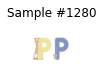

1 (500, 500, 3)


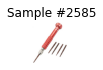

2 (500, 500, 3)


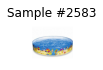

3 (500, 500, 3)


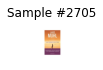

4 (500, 500, 3)


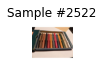

5 (500, 500, 3)


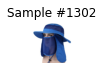

In [48]:
face_dataset = MultimodalDataset(tokenizer=tokenizer, input_csv_file="/content/X_train_update.csv", root_dir="/content/images/images/image_train",max_length=60 , transform=None,Y_csv_file="/content/Y_train_CVw08PX.csv")

fig = plt.figure()
l=np.random.random_integers(0,84916,6)
for i in range(len(l)):
    sample = face_dataset[l[i]]

    print(i, sample['image'].shape)

    ax = plt.subplot(1, 6, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(face_dataset.classes[sample["label"]]))
    ax.axis('off')
    show_landmarks(sample["image"])
    plt.show()

In [49]:
4%3

1

In [50]:
height=[]
width=[]
for i in range(84916):
  image=io.imread(os.path.join('/content/images/images/image_train', new_data["image_path"].iloc[i]))
  height.append(image.shape[0])
  width.append(image.shape[1])

Training Dataset

Image Transformation (Data Augmentation)

In [51]:
class Microscope:
    """
    Cutting out the edges around the center circle of the image
    Imitating a picture, taken through the microscope

    Args:
        p (float): probability of applying an augmentation
    """

    def __init__(self, p: float = 0.5):
        self.p = p

    def __call__(self, img):
        """
        Args:
            img (PIL Image): Image to apply transformation to.

        Returns:
            PIL Image: Image with transformation.
        """
        if random.random() < self.p:
            circle = cv2.circle((np.ones(img.shape) * 255).astype(np.uint8), # image placeholder
                        (img.shape[0]//2, img.shape[1]//2), # center point of circle
                        random.randint(img.shape[0]//2 - 3, img.shape[0]//2 + 15), # radius
                        (0, 0, 0), # color
                        -1)

            mask = circle - 255
            img = np.multiply(img, mask)
        
        return img

    def __repr__(self):
        return f'{self.__class__.__name__}(p={self.p})'

In [78]:
train_transform = transforms.Compose([
    Microscope(p=0.5),
    transforms.ToPILImage(),
    transforms.RandomResizedCrop(size=384, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

data_transforms = {
    'train': transforms.Compose([
        Microscope(p=0.5),
        transforms.ToPILImage(),
        transforms.RandomResizedCrop(size=384, scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(512),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

Building the model we will use 

In [160]:
import torch.nn as nn 
import transformers as tt
from transformers import CamembertModel, CamembertTokenizer
from torchvision import models,transforms
class Feature_Extraction(nn.Module):
    # deuxieme dimension de l'output de chaque tenseurs a la sortie d'un layer de resnet
    resnet_caracteristics=[64,64,64,64,256,512,1024,2048,2048]
    pooling_target=[(4,8),(4,8),(4,8),(4,8),(2,4),(2,2),(1,2),(1,1),(1,1)]
    embedding_strategy={"Second_to_last_average":768,"Start_token_embedding":768,"last_four_embedding_average":3072}
    def __init__(self,resnet_layers=-1,to_tune=False,sentence_embedding="Second_to_last_average"):
        #super(, self).__init__()
        super().__init__()
        self.config = CamembertConfig.from_pretrained("camembert-base", output_hidden_states=True)
        self.camembert =CamembertModel.from_pretrained("camembert-base", config=self.config)
        self.Resnet = models.resnet50(pretrained=True)
        self.Resnet= nn.Sequential(*list(self.Resnet.children())[:resnet_layers])
        self.pooling=nn.AdaptiveMaxPool2d(self.pooling_target[resnet_layers-1])
        self.flat=nn.Flatten()
        self.strategy=sentence_embedding
        if sentence_embedding not in self.embedding_strategy:
            self.strategy="Second_to_last_average"    
        if self.strategy =="Start_token_embedding":
            to_tune=True
        if to_tune == False:
            for p in self.camembert.parameters():
                p.requires_grad_(False)
            for p in self.Resnet.parameters():
                p.requires_grad_(False)
        self.output_size=2048+ self.embedding_strategy[self.strategy]
    def sentence_embedding(self,hiddens):
        # we get the output of the second to last hidden layers and average it over all token
        if self.strategy == "Second_to_last_average":
            return torch.mean(hiddens[-2],dim=1) 
        # we use the first token embedding  from the ouptut last hidden layers 
        # fine_tune should be true 
        elif self.strategy == "Start_token_embedding":
            return hiddens[-1].permute(1,0,2)[0]
        # we use the last four hidden layer average and concatenate them
        elif self.strategy == "last_four_embedding_average":
            x=torch.cat((hiddens[-4],hiddens[-3],hiddens[-2],hiddens[-1]),dim=2)
            return torch.mean(x,dim=1)
    def forward(self, input,image,attention_mask=None):
        hiddens = self.camembert(input,attention_mask=attention_mask)[2]
        embeddings=self.sentence_embedding(hiddens)
        x=self.Resnet(image)
        h=self.pooling(x)
        return torch.cat((embeddings, self.flat(h)),dim=1)

In [64]:
Resnet = models.resnet50(pretrained=True)
list(Resnet.children())

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): Bottleneck(
     (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (downsample): Sequential(
       (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
       (1): BatchNorm2d(256, eps=1e-05, momentum

In [74]:
?nn.Flatten

In [147]:
image=io.imread(os.path.join('/content/images/images/image_train', new_data["image_path"].iloc[25]))
print(image.shape)
image=data_transforms["train"](image)
l=[]
l2=[]
h=nn.Flatten()
for i in range(1,10):
  print(i)
  resnet=nn.Sequential(*list(Resnet.children())[:i])
  resnet.to(device)
  resnet.eval()
  output=resnet(image.to(device).unsqueeze(0))
  l.append(output.size())  
  l2.append(h(output).size())

(500, 500, 3)
1
2
3
4
5
6
7
8
9


In [148]:
l,l2

([torch.Size([1, 64, 192, 192]),
  torch.Size([1, 64, 192, 192]),
  torch.Size([1, 64, 192, 192]),
  torch.Size([1, 64, 96, 96]),
  torch.Size([1, 256, 96, 96]),
  torch.Size([1, 512, 48, 48]),
  torch.Size([1, 1024, 24, 24]),
  torch.Size([1, 2048, 12, 12]),
  torch.Size([1, 2048, 1, 1])],
 [torch.Size([1, 2359296]),
  torch.Size([1, 2359296]),
  torch.Size([1, 2359296]),
  torch.Size([1, 589824]),
  torch.Size([1, 2359296]),
  torch.Size([1, 1179648]),
  torch.Size([1, 589824]),
  torch.Size([1, 294912]),
  torch.Size([1, 2048])])

In [83]:
len(l),len(l[:-1])

(9, 8)

In [97]:
768*4

3072

In [92]:
torch.cat((all_layer_embeddings[-2],all_layer_embeddings[-1]),dim=2).size()

torch.Size([1, 10, 1536])

In [131]:
?nn.AdaptiveMaxPool2d

In [108]:
import random
import cv2

In [109]:
face_dataset = MultimodalDataset(tokenizer=tokenizer, input_csv_file="/content/X_train_update.csv", root_dir="/content/images/images/image_train",max_length=60 , transform=data_transforms["train"],Y_csv_file="/content/Y_train_CVw08PX.csv")
x=face_dataset[25]

In [134]:
x

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 'image': tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.03

In [146]:
x["image"].size()

torch.Size([3, 384, 384])

In [154]:
extractor=Feature_Extraction(resnet_layers=6,to_tune=False,sentence_embedding="Second_to_last_average").to(device)

In [155]:
extractor.eval()

Feature_Extraction(
  (camembert): CamembertModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32005, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): Laye

In [156]:
embed,features=extractor(input=x["input_ids"].to(device),image=(x["image"].to(device)).unsqueeze(0),attention_mask=x["attention_mask"].to(device))

torch.Size([1, 512, 48, 48])
torch.Size([1, 512, 2, 2])


In [159]:
extractor.strategy

'Second_to_last_average'

In [157]:
embed.size()#1,768

torch.Size([1, 768])

In [ ]:
class Multimodal_Dense_model(nn.Module):
    def __init__(self,dropout=0.2,resnet_layers=-1,to_tune=False,sentence_embedding="Second_to_last_average"):
        #super(, self).__init__()
        super().__init__()
        self.feature_extractor=Feature_Extraction(resnet_layers=resnet_layers,to_tune=to_tune,sentence_embedding=sentence_embedding)
        self.input_size=self.feature_extractor.output_size
        self.dense_layer=nn.Sequential(OrderedDict([
          ('dense1', nn.Linear(in_features=self.input_size,out_features=768),
          ('relu1', nn.ReLU()),
          ('dropout1', nn.Dropout(p=0.2)),
          ('dense2', nn.Linear(in_features=768,out_features=256),
          ('relu2', nn.ReLU()),
          ('dropout2', nn.Dropout(p=0.2)),
          ('dense3', nn.Linear(in_features=256,out_features=64),
          ('relu3', nn.ReLU()),
          ('dropout3', nn.Dropout(p=0.2))
        ]))
        self.fc=nn.Linear(64,27)
    def forward(self, input,image,attention_mask=None):
        feature=self.feature_extractor(input=input,image=image,attention_mask=attention_mask)
        h=self.dense_layer(feature)
        return self.fc(h)